# Support Vector Machines

<a href="https://en.wikipedia.org/wiki/Support_vector_machine">Support Vector Machines</a> are non-probabilistic classification models.

Given a linearly seperable collection of samples in different classes, find a hyperplane with the maximum margin between the training examples. By margin we mean distance to the nearest samples of each class. As only the closest samples matter (adding new samples further away won't change the model), the closest samples are called "support vectors". Mathematically, we find vectors w and b so that w * x > 1 for all positive samples, w * x -b > -1 for all negative samples, and 2/|w| is minimized: 
<center><img src="images/svm.jpg" style="width:500px;height:250;"></center>

If the data is not linearly separable, then one can use the <a href="https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick">kernel trick</a> to have the algorithm use a non-standard dot-product. The RBF and polynomial kernals being the most popular.

An alternative/complementary idea, which can make the model more robust to outliers in the training data, is to use soft-margins. Soft-margins allow some data to live in the margin or even on the wrong side of the hyperplane.

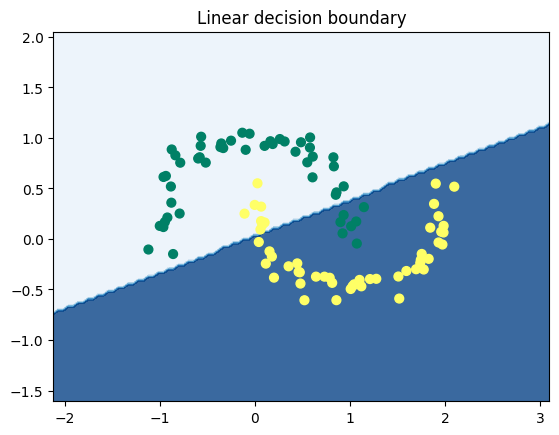

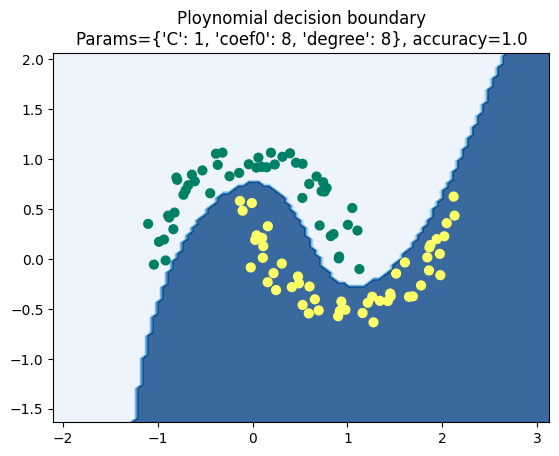

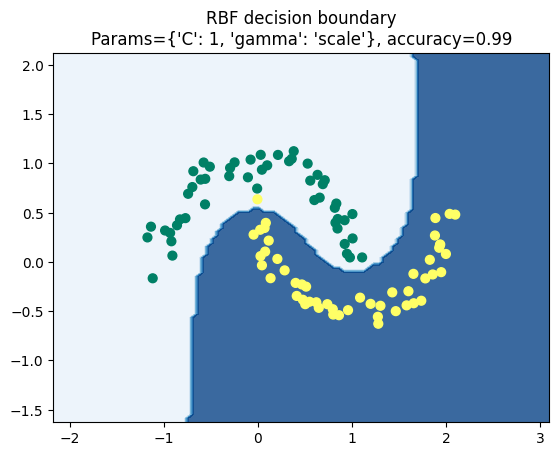

In [3]:
from utils import plot_decision_boundary
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

np.random.seed(12)

def svc_linear_kernel_test():
    """ Try the svc linear kernal """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking
    model = SVC(kernel='linear')
    model.fit(x, y)
    plot_decision_boundary(x, y, model.predict, title="Linear decision boundary", n_cells=100)

def svc_poly_kernel_test():
    """ Try the svc polynomial kernal """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking

    # Find the best parameters for a ploynomial kernel, then show the fit
    model = SVC(kernel='poly')
    params = {"degree": sp_randint(1, 10),  # Polynomial degree
            "coef0": sp_randint(0, 10),     # The independent term in the polynomial kernel (for regularization)
            "C": [0.1, 1, 10, 100],}        # Controls hard vs soft margines (another regularization parameter)
    models = RandomizedSearchCV(model, param_distributions=params, n_iter=20, cv=5, scoring='accuracy')
    models.fit(x, y)
    model = models.best_estimator_
    accuracy = model.score(x, y)
    plot_decision_boundary(x, y, model.predict, title=f"Ploynomial decision boundary\nParams={models.best_params_}, accuracy={accuracy}", n_cells=100)

def svc_rbf_kernel_test():
    """ Try the RBF kernel """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking

    model = SVC(kernel='rbf')
    params = {"gamma" : ["scale", "auto"],  # Kernel coefficient
        "C": [0.1, 1, 10, 100],             # Regularization parameter (hard vs soft margin)
    }
    models = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
    models.fit(x, y)
    model = models.best_estimator_
    accuracy = model.score(x, y)
    plot_decision_boundary(x, y, model.predict, title=f"RBF decision boundary\nParams={models.best_params_}, accuracy={accuracy}", n_cells=100)

svc_linear_kernel_test()
svc_poly_kernel_test()
svc_rbf_kernel_test()